In [222]:
path = "../Launch_CG_simulations/AKT3_md/"

In [247]:
import matplotlib.pyplot as plt

In [223]:
import pandas as pd
import numpy as np
rmsf = []
rmsf_norm = []
discrete_value = []

with open(path+"rmsf.xvg") as f:
    lines = f.readlines()
    for line in lines[17:]:
        rmsf.append(float(line.split()[1]))
average = sum(rmsf)/len(rmsf)
std_dev = np.std(rmsf)

for val in rmsf:
    rmsf_norm.append((val-average)/std_dev)
    
for val in rmsf_norm:
    if(val>=-4 and val<-3):
        discrete_value.append('P')
    elif(val>=-3 and val <-2):
        discrete_value.append('F')
    elif(val>=-2 and val<-1):
        discrete_value.append('M')
    elif(val>=-1 and val<0):
        discrete_value.append('K')
    elif(val>=0 and val<1):
        discrete_value.append('L')
    elif(val>=1 and val<2):
        discrete_value.append('I')
    elif(val>=2 and val<3):
        discrete_value.append('H')
    else:
        discrete_value.append('G')
        

In [224]:
data2 = pd.DataFrame({'rmsd':rmsf,'rmsf_norm':rmsf_norm,'Discrete_values': discrete_value})
data2.to_csv(path+"rmsf_ANALYSIS_test.csv")

In [225]:
data = pd.read_csv(path+"rmsf_ANALYSIS_test.csv")
data.head(5)

,Unnamed: 0,rmsd,rmsf_norm,Discrete_values
0,0,0.3561,4.162034,G
1,1,0.2041,0.881538,L
2,2,0.1753,0.259970,L
3,3,0.1642,0.020408,L
4,4,0.1193,-0.948633,K


In [226]:
# win_siz_start = 6
# win_siz_end = 15
# for i in range(0,len(rmsf_atomwise)-15):
#     limit = win_siz_start
#     while(limit<=win_siz_end):
#         L_percent = get_L_percent(rmsf_atomwise[i:i+limit])
#         GHI_percent = get_GHI_percent(rmsf_atomwise[i:i+limit])
#         avg_rmsf = get_Avg_rmsf(rmsf_norm_atomwise[i:i+limit])
#         if(L_percent > 0.37 or GHI_percent > 0.16 or ):
#             if(avg_rmsf >= 1):
#                 print("mobile segment: "+ str(i)+" "+str(i+limit) +" L% : "+str(round(L_percent,2)) +
#                                                             " GHI% : "+ str(round(GHI_percent,2)))
#                 break
#             else:
#                 limit = limit + 1
#         else:
#             limit = limit + 1
            

In [227]:
rmsf_atomwise = list(data['Discrete_values'])
rmsf_norm_atomwise = list(data['rmsf_norm'])

file = open(path+"mobile_segments.txt",'w')
win_siz_start = 6
win_siz_end = 15
for i in range(0,len(rmsf_atomwise)-15):
    limit = win_siz_start
    while(limit<=win_siz_end):
        L_percent = get_L_percent(rmsf_atomwise[i:i+limit])
        GHI_percent = get_GHI_percent(rmsf_atomwise[i:i+limit])
        avg_rmsf = get_Avg_rmsf(rmsf_norm_atomwise[i:i+limit])
        if(L_percent > 0.45 or GHI_percent > 0.2):
            file.write("mobile segment: "+ str(i)+" "+str(i+limit) +" L% : "+str(round(L_percent,2)) +
                                                            " GHI% : "+ str(round(GHI_percent,2))+"\n")
            print("mobile segment: "+ str(i)+" "+str(i+limit) +" L% : "+str(round(L_percent,2)) +
                                                            " GHI% : "+ str(round(GHI_percent,2)))
            break
        else:
            limit = limit + 1
file.close()
            

mobile segment: 0 6 L% : 0.67 GHI% : 0.17
mobile segment: 1 7 L% : 0.83 GHI% : 0.0
mobile segment: 2 8 L% : 0.83 GHI% : 0.0
mobile segment: 3 9 L% : 0.67 GHI% : 0.0
mobile segment: 4 10 L% : 0.5 GHI% : 0.0
mobile segment: 5 11 L% : 0.5 GHI% : 0.0
mobile segment: 36 50 L% : 0.36 GHI% : 0.21
mobile segment: 37 46 L% : 0.22 GHI% : 0.22
mobile segment: 38 46 L% : 0.25 GHI% : 0.25
mobile segment: 39 46 L% : 0.29 GHI% : 0.29
mobile segment: 40 48 L% : 0.5 GHI% : 0.12
mobile segment: 41 49 L% : 0.5 GHI% : 0.12
mobile segment: 42 50 L% : 0.38 GHI% : 0.25
mobile segment: 43 49 L% : 0.5 GHI% : 0.17
mobile segment: 44 50 L% : 0.5 GHI% : 0.33
mobile segment: 45 51 L% : 0.5 GHI% : 0.5
mobile segment: 46 52 L% : 0.67 GHI% : 0.33
mobile segment: 47 53 L% : 0.5 GHI% : 0.33
mobile segment: 48 54 L% : 0.5 GHI% : 0.33
mobile segment: 49 55 L% : 0.33 GHI% : 0.33
mobile segment: 50 56 L% : 0.5 GHI% : 0.17
mobile segment: 51 57 L% : 0.5 GHI% : 0.0
mobile segment: 52 60 L% : 0.5 GHI% : 0.0
mobile segment: 53

In [228]:
def get_L_percent(listA):
    sumL = 0
    for letr in listA:
        if(letr == 'L'):
            sumL = sumL + 1
    return (sumL/len(listA))
    

In [53]:
def get_GHI_percent(listA):
    sumGHI = 0
    for letr in listA:
        if(letr == 'G' or letr == 'H' or letr == 'I' ):
            sumGHI = sumGHI + 1
    return (sumGHI/len(listA))

In [54]:
def get_Avg_rmsf(listA):
    sum_ = 0
    for i in listA:
        sum_ = sum_ + i
    return sum_/len(listA)
    

In [231]:
data = pd.read_csv(path+"rmsf_ANALYSIS_test.csv")

Index(['Unnamed: 0', 'rmsd', 'rmsf_norm', 'Discrete_values'], dtype='object')

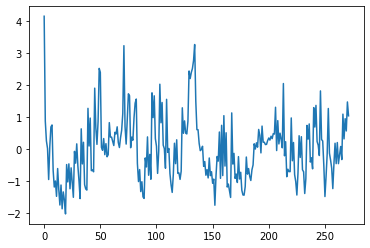

In [248]:
X = data['Unnamed: 0'].values.tolist()
Y = data["rmsf_norm"].values.tolist()
plt.plot(X,Y)
plt.figure